# 딥러닝 (Week 4. Support vector machine)

by Kyoungwon Seo (Dept. of Applied Artificial Intelligence, SeoulTech)
- e: kwseo@seoultech.ac.kr
- w: https://hai.seoultech.ac.kr

강의계획
1. 선형 SVM 분류
2. 비선형 SVM 분류
  - 2.1. 다항식 커널
  - 2.2. 유사도 특성
  - 2.3. 가우시안 RBF 커널
  - 2.4. 계산 복잡도
3. SVM 회귀
4. SVM 이론
  - 4.1. 결정함수와 예측
  - 4.2. 목적함수

## 1. [종류] 선형 SVM 분류

### 0) 목적

- SVM의 목적: 클래스 사이에 최대한 폭이 넓은 도로를 찾음 (라지 마진 분류, large margin classification)

### 1) 용어

- SVM 용어
  - 결정경계(decision boundary): 클래스를 분류하는 경계 ♣
  - 서포트벡터(support vector): 결정경계 위 or 가장 가깝게 위치한 샘플 ♣♣
  - 마진(margin): 결정경계 사이의 거리 ♣♣
  - 도로(street): 마진이 이루는 공간

### 2) 개념

서포트 벡터 머신(suppor vector machine; SVM)
- 매우 강력하고 선형, 비선형 분류, 회귀, 이상치 탐색 사용 가능한 다목적 머신러닝 모델
- 복잡한 분류 문제에 잘 맞으며, 작거나 중간 크기의 데이터셋에 적합(빅테크 기업이 아닌 경우 현실에서 주로 마주하는 데이터셋) ♣♣

### 3) 예측

**식 5-2: 선형 SVM 분류기의 예측** ♣♣

$
\hat{y} = \begin{cases}
 0 & \mathbf{w}^T \mathbf{x} + b < 0 \text{ 일 때}, \\
 1 & \mathbf{w}^T \mathbf{x} + b \geq 0 \text{ 일 때}
\end{cases}
$

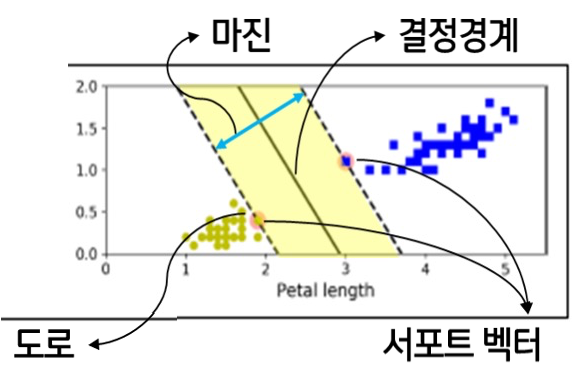

In [4]:
from sklearn.svm import SVC
from sklearn import datasets

#iris 데이터 메모리 할당 및 INPUT OUTPUT 할당
iris = datasets.load_iris() #Iris 데이터셋 메모리 할당
print(iris)
X = iris["data"][:, (2, 3)] # Feature 중 꽃잎 길이, 꽃잎 너비 할당
y = iris["target"] #클래스 할당

setosa_or_versicolor = (y == 0) | (y == 1) # y가 0 또는 1인 것이 참인지 거짓인지 출력

# Setosa or Versicolor 클래스만 할당
X = X[setosa_or_versicolor] # x 가 0 또는 1 클래스인 y의 Index에 위치한 Feature 만 출력
y = y[setosa_or_versicolor] # y가 0또는 1 클래스에 속한 Index에 위치한 Y만 출력

# SVM 분류 모델 학습
svm_clf = SVC(kernel="linear", C=float("inf")) # Kernel이 Linear이며 C값은 inf로 하드 마진임
svm_clf.fit(X, y)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

SVC(C=inf, kernel='linear')

In [26]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0] #svm kernal='linear'일때 weight 값
    b = svm_clf.intercept_[0] #svm bias 값

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)# x최소값~x최대값을 200등분
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    #margin 범위 지정
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

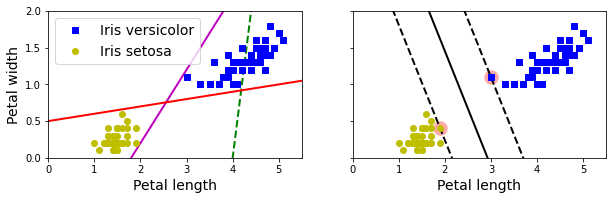

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 나쁜 모델
x0 = np.linspace(0, 5.5, 200) # 0~5.5범위를 200등분
pred_1 = 5*x0 - 20 #예시 1
pred_2 = x0 - 1.8 # 예시 2
pred_3 = 0.1 * x0 + 0.5 #예시 3

# fig 생성
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)


# fig.1. linear model e.g. logistic regression
plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

# fig.2. svc model
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

### 4) 선형 분류 vs 라지 마진 분류 비교

**<그림 5–1. 라지 마진 분류>**

- 왼쪽 그래프
  - 선형 분류 ♣♣
  - 실선 결정 경계: 클래스는 적절하게 분류하지만, 결정 경계가 샘플과 너무 가까워서 새로운 샘플에서는 적절하게 분류하지 못할 수 있음
  - 일반화가 어려움

- 오른쪽 그래프
  - 라지 마진 분류 ♣♣
  - 실선 결정 경계: SVM 분류기의 결정 경계
  - 클래스를 적절하게 나눔 + 결정 경계와 가장 가까운 훈련 샘플로부터 가능한 한 멀리 떨어져 있음
  - 일반화가 쉬움

- SVM은 특성 스케일에 민감함 --> StandardScaler() 사용 필요 ♣♣♣

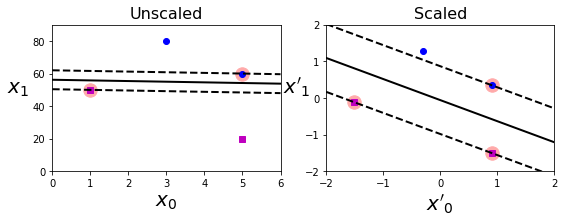

In [28]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64) #예시 샘플
ys = np.array([0, 0, 1, 1])#예시 샘플

#linear svc 학습
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

#예시 샘플 그래프 출력
plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])


#Standardization 진행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Standardization적용
X_scaled = scaler.fit_transform(Xs) #  Feature Scale 적용
svm_clf.fit(X_scaled, ys)# scale feature 학습
# 예시 샘플 정규화 결과
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

plt.show()

**<그림 5-2. 특성 스케일에 따른 민감성>**

### 5) 종류

### (1) 하드 마진 분류 (hard margin classification)

#### 1] 개념

- 목표: 모든 샘플을 도로 바깥쪽에 올바르게 분류

#### 2] 특징

- 그러나, (1) 데이터가 선형적이어야만 제대로 작동하며 ♣♣
- (2) 이상치에 민감함 ♣
- (3) 일반화가 잘 되지 않을 수 있음 ♣

#### 3] 목적함수

**식 5-3: 하드 마진 선형 SVM 분류기 목적 함수** ♣♣

$
\begin{split}
&\underset{\mathbf{w}, b}{\operatorname{minimize}}\quad{\frac{1}{2}\mathbf{w}^T \mathbf{w}} \\
&\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 \quad \text{for } i = 1, 2, \dots, m
\end{split}
$

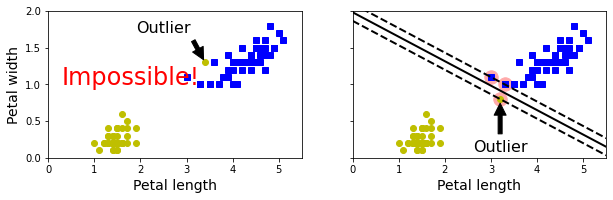

In [29]:
# OutLier 추가
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)

Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

**<그림 5-3. 이상치에 민감한 하드 마진>**

- 왼쪽 그래프
  - 이상치 때문에 타 클래스에 섞임
  - 하드 마진 불가능

- 오른쪽 그래프
  - 타 클래스에 매우 가까움
  - 가능하지만 일반화가 어려움

### (2) 소프트 마진 분류 (soft margin classification)

#### 1] 개념

- 목적: 하드 마진(도로의 폭을 가능한 넓게 유지하는 것)과 마진 오류(margin error, 샘플이 도로 중간이나 반대에 있는 경우) 사이에 적절한 균형을 제안 ♣♣

#### 2] 특징

- 하이퍼파라미터 C 조정 (SVM 모델이 과대적합할 경우 C를 감소시켜 모델 규제)
  - C 값이 작을수록 → 마진이 커지고, 마진 오류가 증가, 과소적합 ♣♣
  - C 값이 클수록 → 마진이 작아지고, 마진 오류가 감소, 과대적합 ♣♣

**식 5-4: 소프트 마진 선형 SVM 분류기 목적 함수** ♣♣

$
\begin{split}
&\underset{\mathbf{w}, b, \mathbf{\zeta}}{\operatorname{minimize}}\quad{\dfrac{1}{2}\mathbf{w}^T \mathbf{w} + C \sum\limits_{i=1}^m{\zeta^{(i)}}}\\
&\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 - \zeta^{(i)} \quad \text{and} \quad \zeta^{(i)} \ge 0 \quad \text{for } i = 1, 2, \dots, m
\end{split}
$

In [30]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

#데이터셋 메모리 할당
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica이면 True 아니면 False

#머신러닝 파이프라인 설계
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])
#학습
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [31]:
svm_clf.predict([[5.5, 1.7]])# 예측

array([1.])

In [32]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

#각기 다른 C하이퍼 파라미터 조절 후 머신러닝 파이프라인 설계
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])
# 학습
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [33]:
# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에 
# LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

<function matplotlib.pyplot.show(*args, **kw)>

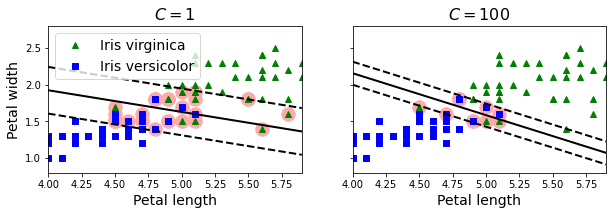

In [34]:
#figure 생성
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

#fig.1. C=1 일때
plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

#fig.2. C=100 일때
plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.show

**<그림 5-4. 넓은 마진(왼쪽) 대 적은 마진 오류(오른쪽)>**

## 2. [종류] 비선형 SVM 분류

### 1) 개념

- 실제 데이터 중 선형적으로 분류할 수 없는 데이터셋이 많음

### 2) 종류

- 해결책 1: 다항 특성 활용 --> 다항 특성을 추가한 후 선형 SVC 적용 ♣♣
- 해결책 2: 유사도 특성 활용 --> 유사도 특성을 추가한 후 선형 SVC 적용 ♣♣
- 해결책 3: SVC + 커널 트릭 --> 새로운 특성을 실제로 추가하지 않으면서 동일한 결과를 유도하는 "커널 트릭" 방식을 활용 ♣♣
    - 예제 1: 다항 커널 (주의: 책에서는 다항식 커널로 불림)
    - 예제 2: 가우시안 RBF(방사 기저 함수) 커널

**식 5-10: 일반적인 커널** ♣♣

$
\begin{split}
\text{선형:} & \quad K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^T \mathbf{b} \\
\text{다항식:} & \quad K(\mathbf{a}, \mathbf{b}) = \left(\gamma \mathbf{a}^T \mathbf{b} + r \right)^d \\
\text{가우시안 RBF:} & \quad K(\mathbf{a}, \mathbf{b}) = \exp({\displaystyle -\gamma \left\| \mathbf{a} - \mathbf{b} \right\|^2}) \\
\text{시그모이드:} & \quad K(\mathbf{a}, \mathbf{b}) = \tanh\left(\gamma \mathbf{a}^T \mathbf{b} + r\right)
\end{split}
$

#### (1) 다항 특성 활용

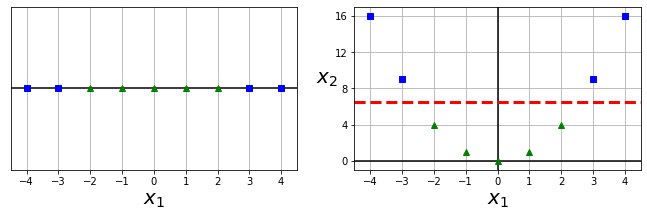

In [43]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

#fig.1. before
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

#fig.2. after
plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

**<그림 5-5. 특성을 추가하여 선형적으로 구분되는 데이터셋 만들기>**

- 특성 x1 하나만 갖는 모델에 새로운 특성 x2을 추가한 후 선형 SVM 분류 적용

- PolynomialFeatures 변환기, StandardScaler, LinearSVC 연결한 비선형 SVM ♣♣
  - 예제: moons 데이터셋 (이진 분류를 위한 마주보는 두 개의 반원 모양 데이터 포인트)

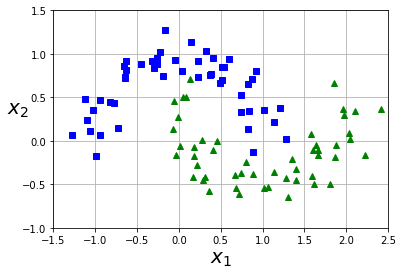

In [44]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [45]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#머신러닝 파이프라인 설계
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)), #3차 항까지 추가
        ("scaler", StandardScaler()),# standardization
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42)) # svc  모델 설계
    ])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

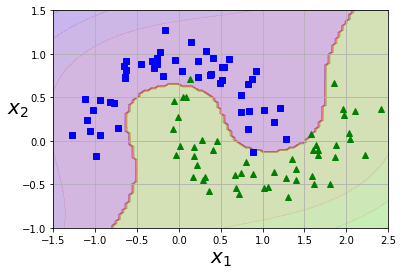

In [46]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

**<그림 5-6. 다항 특성을 사용한 선형 SVM 분류기> 생성 코드**

### (1) 다항식 커널

#### 1] 개념

- 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못함
- 높은 차수의 다항식은 굉장히 많은 특성을 추가하므로 모델을 느리게 만듦 ♣♣
- SVM은 "커널 트릭"을 활용해 실제로는 특성을 추가하지 않으면서도 다항식 특성을 추가한 것과 같은 결과를 얻을 수 있음 ♣♣

- 매개변수 의미 ♣♣
  - degree: 모델의 차수 조절
  - coef0: 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절

In [47]:
from sklearn.svm import SVC

#degree=3 인 SVC 파이프라인 설계
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [48]:
#degree=10 인 SVC 파이프라인 설계
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

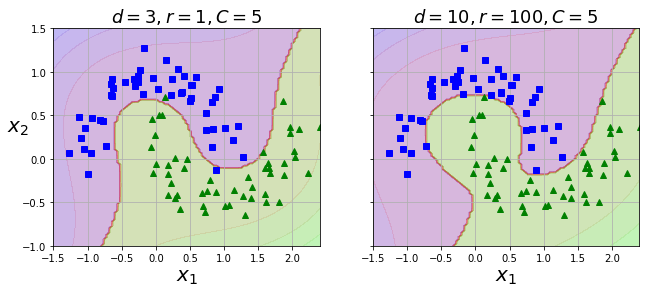

In [49]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

**<그림 5-7. 다항식 커널을 사용한 SVM 분류기>**
  - 모델이 과대적합이면 차수(degree)를 줄여야 함 ♣♣
  - 적절한 하이퍼파라미터(coef0 = r, C 등)는 그리드 탐색 등을 이용하여 찾음
  - 처음에는 그리드의 폭을 크게, 그 다음에는 좀 더 세밀하게 검색 ♣♣

### (2) 유사도 특성

#### 1] 개념

- 각 샘플이 특정 랜드마크(landmark)와 얼마나 닮았는지 측정하는 유사도 함수(similarity function)로 계산한 특성을 새롭게 추가 ♣♣♣
  - 유사도 함수 예제: 가우시안 방사 기저 함수(radial basis function, RBF) ♣♣

#### 2] 예시 - 가우시안 RBF

**식 5-1: 가우시안 RBF** ♣♣

$
{\displaystyle \phi_{\gamma}(\mathbf{x}, \boldsymbol{\ell})} = {\displaystyle \exp({\displaystyle -\gamma \left\| \mathbf{x} - \boldsymbol{\ell} \right\|^2})}
$

  - $l$ : 랜드마크 ♣♣♣
  - $r$ : 값이 작을수록 폭이 넓은 종 모양이 됨 ♣♣♣
  - $r$ 값이 클수록 가까운 샘플 선호, 즉 샘플들 사이의 영향을 보다 적게 고려하여 모델의 자유도를 높이게 되어 과대적합 위험 커짐 ♣♣♣


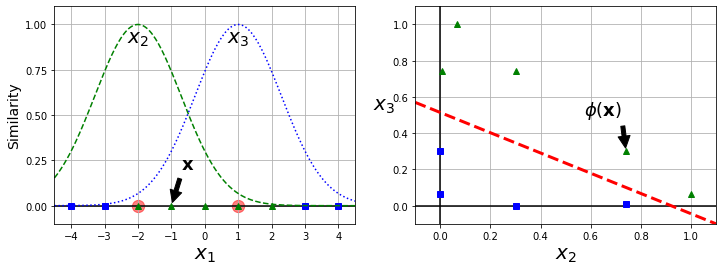

In [50]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

**<그림 5-8. 가우시안 RBF를 사용한 유사도 특성> 생성 코드**

- 랜드마크: -2와 1 ♣♣♣
  - x2와 x3 : 각각 -2와 1에 대한 가우시안 RBF 함수로 계산한 유사도 특성
  - 화살표가 가리키는 점: x = −1

- 유사도 특성 추가 + 선형 SVC ♣♣♣
  - 모든 샘플을 랜드마크로 지정 후 각 랜드마크에 대한 유사도를 새로운 특성으로 추가 하는 방식이 가장 간단함 ♣♣
  - (n 개의 특성을 가진 m개의 샘플) -> ( n+m 개의 특성을 가진 m 개의 샘플)
  - 장점: 차원이 커지면서 선형적으로 구분될 가능성이 높아짐 ♣♣
  - 단점: 훈련 세트가 매우 클 경우 동일한 크기의 아주 많은 특성이 생성됨 ♣♣

### (3) 커널 트릭 - 가우시안 RBF 커널

- 커널 트릭을 통해 유사도 특성을 많이 추가하는 것과 비슷한 결과를 얻을 수 있음 ♣♣

In [51]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

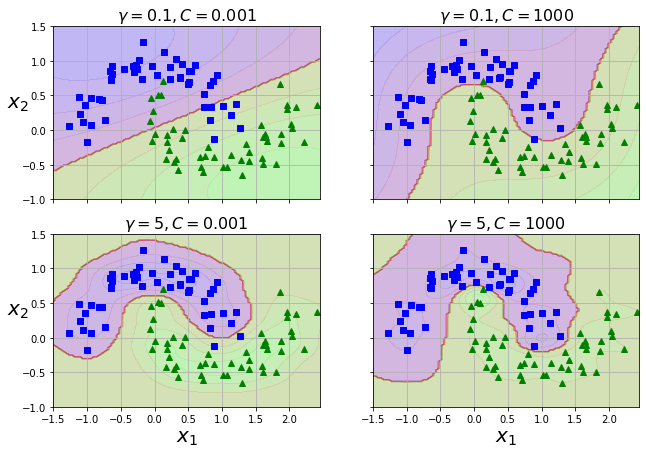

In [52]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

**<그림 5-9. RBF 커널을 사용한 SVM 분류기>**

- gamma를 증가 ♣
  - 종 모양 그래프가 좁아져 각 샘플의 영향범위가 작아짐
  - 결정 경계가 조금 더 불규칙해지고 각 샘플에 따라 구불구불하게 휘어짐
  - 과대 적합 가능성
- gamma를 감소 ♣
  - 넓은 종 모양 그래프를 만들며 샘플이 넓은 범위에 걸쳐 영향을 줌
  - 결정 경계가 더 부드러워짐
  - 과소 적합 가능성
- 모델이 과대적합일 경우 gamma 감소해야함, 과소적합일 경우 gamma 증가해야함

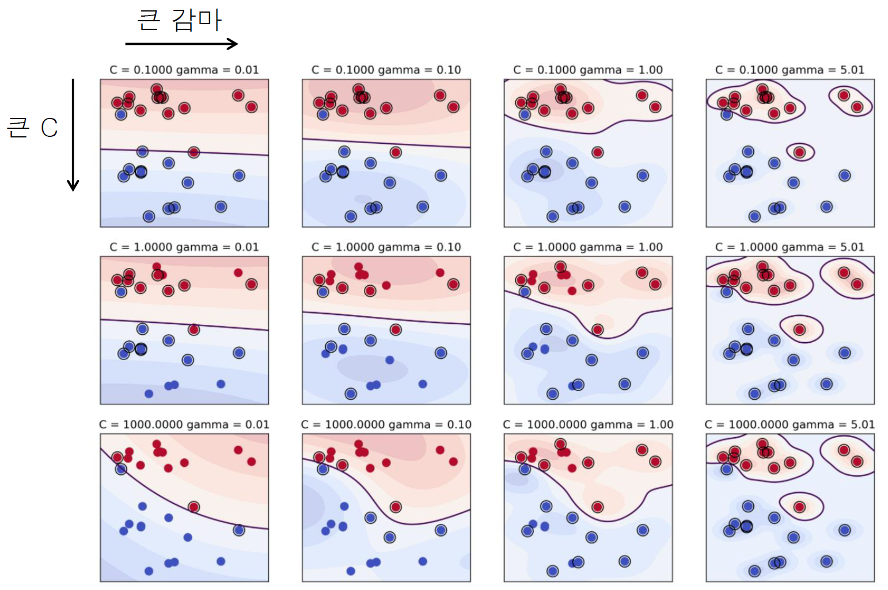

- 데이터 구조에 따라 다양한 커널을 사용할 수 있음 ♣♣
  - 문자열 커널(string kernel): 텍스트 문서나 DNA 서열을 분류할 때 사용

## 3. [종류] SVM 회귀

### 1) 개념

- SVM 알고리즘을 선형, 비선형 회귀에도 활용할 수 있음
- SVM 회귀: 제한된 마진 오류(즉, 도로 밖의 샘플) 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습

In [53]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [54]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [55]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

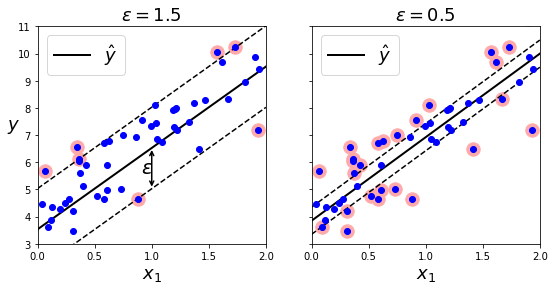

In [56]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

**<그림 5-10. SVM 회귀>**

- 위 도로의 폭은 하이퍼파라미터 ${epsilon}$으로 조절 ♣

In [57]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [58]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

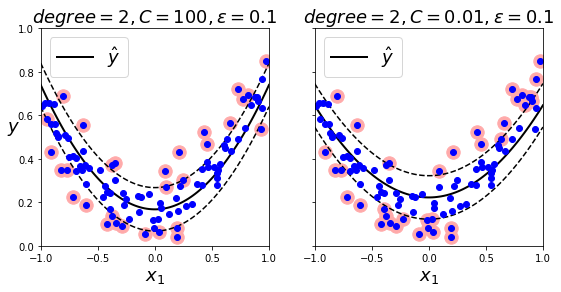

In [59]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

**<그림 5-11. 2차 다항 커널을 사용한 SVM 회귀>**

- 다양한 SVM 파라미터 반드시 기억!!! ♣♣

## 4. SVM 이론

### 1) 결정함수와 예측

**식 5-2: 선형 SVM 분류기의 예측**

$
\hat{y} = \begin{cases}
 0 & \mathbf{w}^T \mathbf{x} + b < 0 \text{ 일 때}, \\
 1 & \mathbf{w}^T \mathbf{x} + b \geq 0 \text{ 일 때}
\end{cases}
$

In [61]:
def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=16)
    ax.set_xlabel(r"Petal length", fontsize=16, labelpad=10)
    ax.set_ylabel(r"Petal width", fontsize=16, labelpad=10)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=5)
    ax.legend(loc="upper left", fontsize=16)

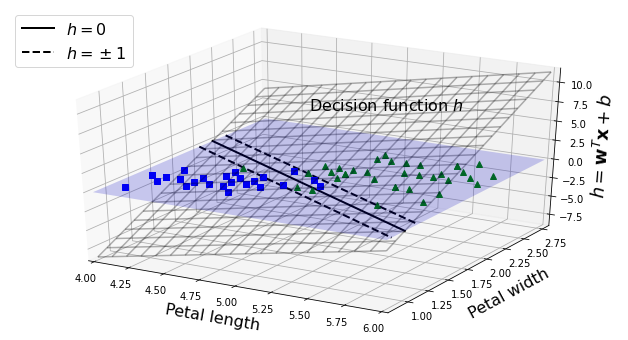

In [62]:
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

plt.show()

**<그림 5-12. iris 데이터셋의 결정 함수>** ♣♣

- 결정경계(직선): 결정 함수값이 0인 점(WTx+b = 0), 두 평면의 교차점(접선) ♣♣♣
- 결정경계 도로의 경계(점선): 결정경계면에서의 함수값이 1 또는 -1인 점 ♣♣♣

### 2) 목적 함수

#### (1) 하드 마진 SVM

- 가중치 벡터의 크기 $||w||$를 최소화해야함 ♣♣♣♣
- 기울기와 마진은 반비례 관계(마진을 크게 하기 위해 기울기를 최소화) ♣♣♣♣
- 함수의 미분가능성 때문에 $|w|$ 를 최소화하는 것보다 쉬움 ♣♣♣♣
- 기울기인 $|w|$는 $w=0$에서 미분할 수 없음, $1/2$은 계산의 편의를 위한 것 ♣♣♣♣

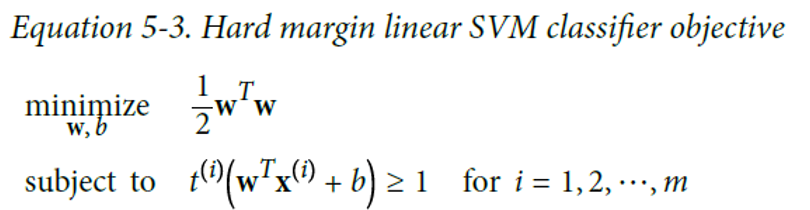

#### (2) 소프트 마진 SVM

- 소프트 마진 분류기의 목적 함수 ♣♣♣
  - 슬랙변수(slack variable) zeta를 통해 마진을 얼마나 위반할지 결정
  - 마진 오류 최소화와 마진 크기 최대화 사이에서의 트레이드오프 (하이퍼파라미터 $C$)
    - 마진 오류 최소화를 위해 가능한 한 슬랙 변수의 값을 작게 만드는 것 ♣♣♣♣
    - 마진을 크게 하기 위해 $1/2w^Tw$를 가능한 한 작게 만드는 것 ♣♣♣♣

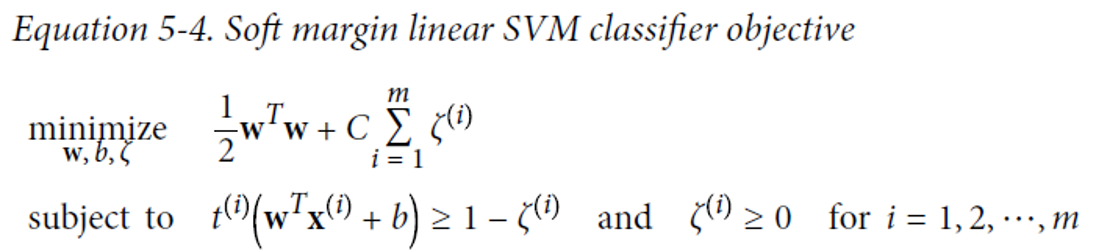